### Version 1.0

1. Groupby DF for each airline
2. Grouby DF for each terminal
3. Combine them to one dataframe

#### TODO:

0. **Some Databricks Table Basics** <br>
  a. Create a table & databse in Databricks <br>
  b. Reading a table from Databricks with filters <br>
  c. [Extra] Unzip & read files from Blob Storage and save to Databricks table <br>
  
1. **Babies First Pandas Dataframe** <br>
a. Read table from Databricks and store to Dataframe <br>
b. Dataframe useful functions (head, describe, info, copy, dtypes etc) <br>
c. Filter dataframes with .loc <br>

2. **More Things to Do with Dataframes** <br>
a. Apply basic functions on DF (sum two columns, change datatypes and more) <br>
b. More DF functions (...) <br>
c. More on filtering dataframes (multiple conditions, using booleans, etc) <br>
d. Sort values, fillna, unique values, unique value counts and more <br>

3. **Groupby and why you will be doing this a lot with Pandas too** <br>
a. More on groupby and aggregation and why is it so important <br>
b. Aggregate by Mean, Sum, First, Max, Head(top 5 values per day for example), etc <br>
c. Aggregate using more than one column, Exclude columns from aggregation <br>

4. **Working with more than one DF** <br>
a. Concat, Join, Split DFs <br>
b. Keeping track of dataframes <br>
c. Using two dataframes together (For plotting, Normalization for ML, etc) <br>
d. Adding a column to an existing dataframe <br>

5. **Other Nice Things** <br>
a. Indexes and multi-indexes and why they are so confusing <br>
b. Rename columns, change column type, etc <br>
c. Encoding using a dictionary <br>
d. Pandas and Numpies <br>

### Dataset Background

This open dataset was accuired from the following Dubai Government Open Data portal: <br>
https://www.dubaipulse.gov.ae/data/dubai-airports-flight-info/da_flight_information_arrivals-open

The dataset structure is Time-series of flight arrivals with mostly categorical attributes like flight status, airline, origin airport, etc. The only numeric column is baggage claim count which can be used to estimate the number of passengers.

### Imports

In [0]:
import numpy as np
import pandas as pd

## Some Databricks Table Basics

First let's upload our dataset

In [0]:
%sh
mkdir /dbfs/FileStore/abdulaziza_files
cd /dbfs/FileStore/abdulaziza_files
ls

In [0]:
%sh
cd /dbfs/FileStore/abdulaziza_files
ls 

In [0]:
import pandas as pd

df = pd.read_csv("/dbfs/FileStore/abdulaziza_files/flight_information_arrivals.csv")

In [0]:
df.head()

Out[8]:

,aodbUniqueField,flightStatus,aircraftRegistration,tenMileOut,flightNumber,trafficTypeCode,arrivalOrDeparture,lastChanged,airlineCode_iata,airlineCode_icao,jointFlightNumber,origin_iata,origin_icao,via_iata,via_icao,destination_iata,destination_icao,aircraft_iata,aircraft_icao,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,estimatedInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
0,868466138,NaN,A6FEU,NaN,FZ 306,PS,A,2021-01-20T06:39:31,FZ,FDB,NaN,KBL,OAKB,NaN,NaN,DXB,OMDB,7S8,B738,NaN,2021-01-20T20:55:00,2021-01-20T20:55:00,NaN,NaN,NaN,E04,6.0,Flydubai,Kabul,NaN,Passenger Scheduled,2
1,868318078,NaN,NaN,NaN,AI 951,PC,A,2021-01-20T07:40:19,AI,AIC,NaN,HYD,VOHS,NaN,NaN,DXB,OMDB,32N,A20N,NaN,2021-01-20T20:30:00,2021-01-20T20:30:00,NaN,NaN,NaN,E10R,5.0,Air India,Hyderabad/Rajiv Gandhi Int'l,NaN,Passenger Charter,2
2,868351711,Estimated,A6EQO,NaN,EK 202,PS,A,2021-01-20T08:31:09,EK,UAE,NaN,JFK,KJFK,NaN,NaN,DXB,OMDB,77W,B77W,EST,2021-01-20T20:25:00,2021-01-20T20:25:00,NaN,NaN,NaN,B24,307.0,Emirates,New York JFK,NaN,Passenger Scheduled,3
3,952084751,Cancelled,NaN,NaN,FZ 010,PS,A,2021-01-19T18:05:36,FZ,FDB,NaN,KWI,OKBK,NaN,NaN,DXB,OMDB,73H,B738,CXX,2021-01-20T20:25:00,2021-01-20T20:25:00,NaN,NaN,NaN,NaN,NaN,Flydubai,Kuwait,NaN,Passenger Scheduled,2
4,868470197,NaN,A6FEY,NaN,FZ 338,PS,A,2021-01-20T07:48:19,FZ,FDB,NaN,SKT,OPST,NaN,NaN,DXB,OMDB,7S8,B738,NaN,2021-01-20T20:20:00,2021-01-20T20:20:00,NaN,NaN,NaN,E29,4.0,Flydubai,Sialkot International Airport,NaN,Passenger Scheduled,2


However, it might be easier to organize if we save our dataset in a Databricks table.

In [0]:
%sql

--We can inject an SQL command in a Python notebook using the above magic command

CREATE DATABASE study_abdulaziza_db COMMENT 'This is a temporary database for the class' LOCATION '/dbfs/FileStore/abdulaziza_files'

In [0]:
#Here we will will store our database name and table name
db_name = 'study_abdulaziza_db'
table_name = 'dxb_flight_arrivals'
db_and_tablename = db_name +'.'+ table_name

In [0]:
#Read the table to a spark dataframe from a csv file
table = spark.read.csv("/FileStore/abdulaziza_files/flight_information_arrivals.csv", header="true", inferSchema="true")

(table.write #Write the table
.format("parquet") #Try parquet format first as it's the best practice. Use csv format if parquet is not usable
#.format("csv") #Format of table. CSV is slowest to read but the only format found to be compatble with our dataset column names
.saveAsTable(db_and_tablename)) #Use specified db and table name

--------------------------------------------------------------------------- 
 AnalysisException Traceback (most recent call last)
 <command-1662042065068091> in <module> 
 5 . format ( "parquet" ) #Try parquet format first as it's the best practice. Use csv format if parquet is not usable 
 6 #.format("csv") #Format of table. CSV is slowest to read but the only format found to be compatble with our dataset column names 
 ----> 7 .saveAsTable(db_and_tablename)) #Use specified db and table name
 
 /databricks/spark/python/pyspark/sql/readwriter.py in saveAsTable (self, name, format, mode, partitionBy, **options) 
 869 if format is not None : 
 870 self . format ( format ) 
 --> 871 self . _jwrite . saveAsTable ( name ) 
 872 
 873 @ since ( 1.4 ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 131 # Hide where the exception came from that shows a non-Pythonic 
 132 # JVM exception message. 
 --> 133 raise_from ( converted ) 
 134 else : 
 135 raise 

 /databricks/spark/python/pyspark/sql/utils.py in raise_from (e) 

 AnalysisException : Table `study_abdulaziza_db`.`dxb_flight_arrivals` already exists.;

In [0]:
#read the table into a spark dataframe from a Databricks table
spark_df = spark.table(db_and_tablename)
display(spark_df)

aodbUniqueField,flightStatus,aircraftRegistration,tenMileOut,flightNumber,trafficTypeCode,arrivalOrDeparture,lastChanged,airlineCode_iata,airlineCode_icao,jointFlightNumber,origin_iata,origin_icao,via_iata,via_icao,destination_iata,destination_icao,aircraft_iata,aircraft_icao,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,estimatedInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
868466138,null,A6FEU,null,FZ 306,PS,A,2021-01-20T06:39:31.000+0000,FZ,FDB,null,KBL,OAKB,null,null,DXB,OMDB,7S8,B738,null,2021-01-20T20:55:00.000+0000,2021-01-20T20:55:00.000+0000,null,null,null,E04,6,Flydubai,Kabul,null,Passenger Scheduled,2
868318078,null,null,null,AI 951,PC,A,2021-01-20T07:40:19.000+0000,AI,AIC,null,HYD,VOHS,null,null,DXB,OMDB,32N,A20N,null,2021-01-20T20:30:00.000+0000,2021-01-20T20:30:00.000+0000,null,null,null,E10R,5,Air India,Hyderabad/Rajiv Gandhi Int'l,null,Passenger Charter,2
868351711,Estimated,A6EQO,null,EK 202,PS,A,2021-01-20T08:31:09.000+0000,EK,UAE,null,JFK,KJFK,null,null,DXB,OMDB,77W,B77W,EST,2021-01-20T20:25:00.000+0000,2021-01-20T20:25:00.000+0000,null,null,null,B24,307,Emirates,New York JFK,null,Passenger Scheduled,3
952084751,Cancelled,null,null,FZ 010,PS,A,2021-01-19T18:05:36.000+0000,FZ,FDB,null,KWI,OKBK,null,null,DXB,OMDB,73H,B738,CXX,2021-01-20T20:25:00.000+0000,2021-01-20T20:25:00.000+0000,null,null,null,null,null,Flydubai,Kuwait,null,Passenger Scheduled,2
868470197,null,A6FEY,null,FZ 338,PS,A,2021-01-20T07:48:19.000+0000,FZ,FDB,null,SKT,OPST,null,null,DXB,OMDB,7S8,B738,null,2021-01-20T20:20:00.000+0000,2021-01-20T20:20:00.000+0000,null,null,null,E29,4,Flydubai,Sialkot International Airport,null,Passenger Scheduled,2
868398422,Estimated,A6EWG,null,EK 724,PS,A,2021-01-20T01:45:28.000+0000,EK,UAE,null,ADD,HAAB,null,null,DXB,OMDB,77L,B77L,EST,2021-01-20T20:15:00.000+0000,2021-01-20T20:15:00.000+0000,null,null,null,F09,309,Emirates,Addis Ababa,null,Passenger Scheduled,3
868413951,null,A6EPN,null,EK 840,PS,A,2021-01-20T00:40:46.000+0000,EK,UAE,null,BAH,OBBI,null,null,DXB,OMDB,77W,B77W,null,2021-01-20T20:00:00.000+0000,2021-01-20T20:00:00.000+0000,null,null,null,F25,305,Emirates,Bahrain,null,Passenger Scheduled,3
868327211,null,A6EQP,null,EK 008,PS,A,2021-01-20T08:00:50.000+0000,EK,UAE,null,LHR,EGLL,null,null,DXB,OMDB,77W,B77W,null,2021-01-20T20:00:00.000+0000,2021-01-20T20:00:00.000+0000,null,null,null,B26L,308,Emirates,London Heathrow,null,Passenger Scheduled,3
868613923,null,null,null,WY 611,PS,A,2021-01-20T00:22:40.000+0000,WY,OMA,null,MCT,OOMS,null,null,DXB,OMDB,333,A333,null,2021-01-20T20:00:00.000+0000,2021-01-20T20:00:00.000+0000,null,null,null,F12,311,Oman Air,Muscat,null,Passenger Scheduled,3
868571816,null,null,null,PR 658,PS,A,2021-01-20T00:23:52.000+0000,PR,PAL,null,MNL,RPLL,null,null,DXB,OMDB,333,A333,null,2021-01-20T19:45:00.000+0000,2021-01-20T19:45:00.000+0000,null,null,null,F17,301,Philippine Airlines,Manila,null,Passenger Scheduled,3


In [0]:
spark_df.columns

Out[17]: ['aodbUniqueField',
 'flightStatus',
 'aircraftRegistration',
 'tenMileOut',
 'flightNumber',
 'trafficTypeCode',
 'arrivalOrDeparture',
 'lastChanged',
 'airlineCode_iata',
 'airlineCode_icao',
 'jointFlightNumber',
 'origin_iata',
 'origin_icao',
 'via_iata',
 'via_icao',
 'destination_iata',
 'destination_icao',
 'aircraft_iata',
 'aircraft_icao',
 'flightStatusCode',
 'publicScheduledDateTime',
 'scheduledInblockTime',
 'estimatedInblockTime',
 'actualLandingTime',
 'actualInblockTime',
 'aircraftParkingPosition',
 'baggageClaimUnit',
 'airlineName',
 'originName',
 'viaName',
 'trafficType',
 'aircraftTerminal']

There a lot of columns that aren't really useful for us. So let's select the columns we want and ignore the rest before converting to a pandas dataframe. 

This is especially important when working with very large datasets, as working with less columns will improve peformance and speed tremendously.

In [0]:
# For example the 'iata' codes seem redundant with the 'icao' codes. So let's ignore all those columns by commenting them out. 

keepColumns = [
 #'aodbUniqueField',
 'flightStatus',
 'aircraftRegistration',
 'tenMileOut',
 'flightNumber',
 #'trafficTypeCode',
 'arrivalOrDeparture',
 'lastChanged',
 'airlineCode_iata',
 #'airlineCode_icao',
 'jointFlightNumber',
 #'origin_iata',
 'origin_icao',
 'via_iata',
 #'via_icao',
 'destination_iata',
 #'destination_icao',
 'aircraft_iata',
 #'aircraft_icao',
 'flightStatusCode',
 'publicScheduledDateTime',
 'scheduledInblockTime',
 'estimatedInblockTime',
 'actualLandingTime',
 'actualInblockTime',
 'aircraftParkingPosition',
 'baggageClaimUnit',
 'airlineName',
 'originName',
 'viaName',
 'trafficType',
 'aircraftTerminal'
]

In [0]:
spark_df = spark.table(db_and_tablename)

spark_df = spark_df.select(*keepColumns)

display(spark_df)

flightStatus,aircraftRegistration,tenMileOut,flightNumber,arrivalOrDeparture,lastChanged,airlineCode_iata,jointFlightNumber,origin_icao,via_iata,destination_iata,aircraft_iata,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,estimatedInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
null,A6FEU,null,FZ 306,A,2021-01-20T06:39:31.000+0000,FZ,null,OAKB,null,DXB,7S8,null,2021-01-20T20:55:00.000+0000,2021-01-20T20:55:00.000+0000,null,null,null,E04,6,Flydubai,Kabul,null,Passenger Scheduled,2
null,null,null,AI 951,A,2021-01-20T07:40:19.000+0000,AI,null,VOHS,null,DXB,32N,null,2021-01-20T20:30:00.000+0000,2021-01-20T20:30:00.000+0000,null,null,null,E10R,5,Air India,Hyderabad/Rajiv Gandhi Int'l,null,Passenger Charter,2
Estimated,A6EQO,null,EK 202,A,2021-01-20T08:31:09.000+0000,EK,null,KJFK,null,DXB,77W,EST,2021-01-20T20:25:00.000+0000,2021-01-20T20:25:00.000+0000,null,null,null,B24,307,Emirates,New York JFK,null,Passenger Scheduled,3
Cancelled,null,null,FZ 010,A,2021-01-19T18:05:36.000+0000,FZ,null,OKBK,null,DXB,73H,CXX,2021-01-20T20:25:00.000+0000,2021-01-20T20:25:00.000+0000,null,null,null,null,null,Flydubai,Kuwait,null,Passenger Scheduled,2
null,A6FEY,null,FZ 338,A,2021-01-20T07:48:19.000+0000,FZ,null,OPST,null,DXB,7S8,null,2021-01-20T20:20:00.000+0000,2021-01-20T20:20:00.000+0000,null,null,null,E29,4,Flydubai,Sialkot International Airport,null,Passenger Scheduled,2
Estimated,A6EWG,null,EK 724,A,2021-01-20T01:45:28.000+0000,EK,null,HAAB,null,DXB,77L,EST,2021-01-20T20:15:00.000+0000,2021-01-20T20:15:00.000+0000,null,null,null,F09,309,Emirates,Addis Ababa,null,Passenger Scheduled,3
null,A6EPN,null,EK 840,A,2021-01-20T00:40:46.000+0000,EK,null,OBBI,null,DXB,77W,null,2021-01-20T20:00:00.000+0000,2021-01-20T20:00:00.000+0000,null,null,null,F25,305,Emirates,Bahrain,null,Passenger Scheduled,3
null,A6EQP,null,EK 008,A,2021-01-20T08:00:50.000+0000,EK,null,EGLL,null,DXB,77W,null,2021-01-20T20:00:00.000+0000,2021-01-20T20:00:00.000+0000,null,null,null,B26L,308,Emirates,London Heathrow,null,Passenger Scheduled,3
null,null,null,WY 611,A,2021-01-20T00:22:40.000+0000,WY,null,OOMS,null,DXB,333,null,2021-01-20T20:00:00.000+0000,2021-01-20T20:00:00.000+0000,null,null,null,F12,311,Oman Air,Muscat,null,Passenger Scheduled,3
null,null,null,PR 658,A,2021-01-20T00:23:52.000+0000,PR,null,RPLL,null,DXB,333,null,2021-01-20T19:45:00.000+0000,2021-01-20T19:45:00.000+0000,null,null,null,F17,301,Philippine Airlines,Manila,null,Passenger Scheduled,3


In [0]:
# Now to we simply use the .toPandas() function to convert the spark dataframe to a pandas dataframe

df_original = spark_df.toPandas()

df_original.head()

Out[93]:

,flightStatus,aircraftRegistration,tenMileOut,flightNumber,arrivalOrDeparture,lastChanged,airlineCode_iata,jointFlightNumber,origin_icao,via_iata,destination_iata,aircraft_iata,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,estimatedInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
0,None,A6FEU,NaT,FZ 306,A,2021-01-20 06:39:31,FZ,None,OAKB,None,DXB,7S8,None,2021-01-20 20:55:00,2021-01-20 20:55:00,None,NaT,NaT,E04,6.0,Flydubai,Kabul,None,Passenger Scheduled,2
1,None,None,NaT,AI 951,A,2021-01-20 07:40:19,AI,None,VOHS,None,DXB,32N,None,2021-01-20 20:30:00,2021-01-20 20:30:00,None,NaT,NaT,E10R,5.0,Air India,Hyderabad/Rajiv Gandhi Int'l,None,Passenger Charter,2
2,Estimated,A6EQO,NaT,EK 202,A,2021-01-20 08:31:09,EK,None,KJFK,None,DXB,77W,EST,2021-01-20 20:25:00,2021-01-20 20:25:00,None,NaT,NaT,B24,307.0,Emirates,New York JFK,None,Passenger Scheduled,3
3,Cancelled,None,NaT,FZ 010,A,2021-01-19 18:05:36,FZ,None,OKBK,None,DXB,73H,CXX,2021-01-20 20:25:00,2021-01-20 20:25:00,None,NaT,NaT,None,NaN,Flydubai,Kuwait,None,Passenger Scheduled,2
4,None,A6FEY,NaT,FZ 338,A,2021-01-20 07:48:19,FZ,None,OPST,None,DXB,7S8,None,2021-01-20 20:20:00,2021-01-20 20:20:00,None,NaT,NaT,E29,4.0,Flydubai,Sialkot International Airport,None,Passenger Scheduled,2


In [0]:
# One thing I like to to do is copy the original df so I can come back to it later
df = df_original.copy()

## Babies First (or Third) Pandas Dataframe

Now that we have a dataframe. Let's go through a few useful functions.

In [0]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [0]:
df.tail(3)

Out[95]:

,flightStatus,aircraftRegistration,tenMileOut,flightNumber,arrivalOrDeparture,lastChanged,airlineCode_iata,jointFlightNumber,origin_icao,via_iata,destination_iata,aircraft_iata,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,estimatedInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
37295,Arrived,HZAQ13,2020-03-11 15:25:00,SV 588,A,2020-03-11 15:57:12,SV,None,OEJN,None,DXB,333,ARR,2020-03-11 16:00:00,2020-03-11 16:00:00,None,2020-03-11 15:29:23,2020-03-11 15:40:00,C47,8.0,Saudi Arabian Airlines,Jeddah/King Abdulaziz Intl,None,Passenger Scheduled,1
37296,None,None,NaT,Y9 6000,A,2020-03-21 13:50:31,Y9,None,OIBK,None,DXB,M82,None,2020-03-22 10:25:00,2020-03-22 10:25:00,None,NaT,NaT,E11R,1.0,Kish Air,Kish,None,Passenger Scheduled,2
37297,Cancelled,None,NaT,XY 207,A,2020-04-09 18:56:00,XY,None,OERK,None,DXB,320,CXX,2020-04-11 18:55:00,2020-04-11 18:55:00,None,NaT,NaT,None,NaN,FlyNas,Riyadh/King Khaled Intl,None,Passenger Scheduled,1


In [0]:
df.shape

Out[11]: (37298, 32)

In [0]:
#df.dtypes # For column datatypes only
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37298 entries, 0 to 37297
Data columns (total 25 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 flightStatus 36170 non-null object 
 1 aircraftRegistration 33548 non-null object 
 2 tenMileOut 31326 non-null datetime64[ns]
 3 flightNumber 37298 non-null object 
 4 arrivalOrDeparture 37298 non-null object 
 5 lastChanged 37298 non-null datetime64[ns]
 6 airlineCode_icao 37298 non-null object 
 7 jointFlightNumber 2635 non-null object 
 8 origin_icao 37298 non-null object 
 9 via_icao 825 non-null object 
 10 destination_icao 37298 non-null object 
 11 aircraft_icao 37298 non-null object 
 12 flightStatusCode 36170 non-null object 
 13 publicScheduledDateTime 37298 non-null datetime64[ns]
 14 scheduledInblockTime 37298 non-null datetime64[ns]
 15 estimatedInblockTime 0 non-null object 
 16 actualLandingTime 31290 non-null datetime64[ns]
 17 actualInblockTime 31198 non-null datetime64[ns]
 18 aircraftParkingPosition 33844 non-null object 
 19 baggageClaimUnit 33536 non-null float64 
 20 airlineName 37298 non-null object 
 21 originName 37298 non-null object 
 22 viaName 797 non-null object 
 23 trafficType 37298 non-null object 
 24 aircraftTerminal 37298 non-null object 
dtypes: datetime64[ns](6), float64(1), object(18)
memory usage: 7.1+ MB

In [0]:
df.describe(include='all')

Out[74]:

,aodbUniqueField,flightStatus,tenMileOut,flightNumber,trafficTypeCode,arrivalOrDeparture,lastChanged,airlineCode_iata,airlineCode_icao,jointFlightNumber,origin_iata,origin_icao,via_iata,via_icao,destination_iata,destination_icao,aircraft_iata,aircraft_icao,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
count,3.729800e+04,36170,31326,37298,37298,37298,37298,37298,37298,2635,37298,37298,825,825,37298,37298,37298,37298,36170,37298,37298,31290,31198,33844,33536.000000,37298,37298,797,37298,37298
unique,NaN,7,30981,1395,3,1,35638,97,98,240,235,234,51,51,2,2,55,47,7,25532,25532,31111,30996,208,NaN,97,235,50,3,4
top,NaN,Arrived,2020-12-24 04:57:00,EK 046,PS,A,2020-08-31 07:46:58,EK,UAE,EK 2095,DEL,VIDP,BKK,VTBS,DXB,OMDB,77W,B77W,ARR,2020-12-24 03:45:00,2020-12-24 03:45:00,2020-12-24 04:02:02,2020-12-24 04:18:35,F17,NaN,Emirates,New Delhi,Bangkok,Passenger Scheduled,3
freq,NaN,31095,7,246,31937,37298,20,15704,15704,120,1469,1469,167,167,37262,37262,14095,14095,31095,18,18,6,6,1588,NaN,15704,1469,167,31937,24615
first,NaN,NaN,2020-03-05 00:28:00,NaN,NaN,NaN,2020-03-04 03:08:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05 00:55:00,2020-03-05 00:55:00,2020-03-05 00:32:41,2020-03-05 00:37:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-01-20 08:32:00,NaN,NaN,NaN,2021-01-20 08:56:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-20 20:55:00,2021-01-20 20:55:00,2021-01-20 08:35:31,2021-01-20 08:39:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.105598e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.467438,NaN,NaN,NaN,NaN,NaN
std,9.860493e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.497455,NaN,NaN,NaN,NaN,NaN
min,5.840245e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,7.375234e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


In [0]:
# The column 'estimatedInblockTime' has 0 values so let's drop it. There are other columns that we don't understand so let's drop those too

dropColumns = ['estimatedInblockTime', 'aircraftRegistration']

df = df.drop(columns=dropColumns)

In [0]:
df.head(1)

Out[17]:

,aodbUniqueField,flightStatus,tenMileOut,flightNumber,trafficTypeCode,arrivalOrDeparture,lastChanged,airlineCode_iata,airlineCode_icao,jointFlightNumber,origin_iata,origin_icao,via_iata,via_icao,destination_iata,destination_icao,aircraft_iata,aircraft_icao,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
0,868466138,None,NaT,FZ 306,PS,A,2021-01-20 06:39:31,FZ,FDB,None,KBL,OAKB,None,None,DXB,OMDB,7S8,B738,None,2021-01-20 20:55:00,2021-01-20 20:55:00,NaT,NaT,E04,6.0,Flydubai,Kabul,None,Passenger Scheduled,2


In [0]:
df.columns

Out[18]: Index(['aodbUniqueField', 'flightStatus', 'tenMileOut', 'flightNumber',
 'trafficTypeCode', 'arrivalOrDeparture', 'lastChanged',
 'airlineCode_iata', 'airlineCode_icao', 'jointFlightNumber',
 'origin_iata', 'origin_icao', 'via_iata', 'via_icao',
 'destination_iata', 'destination_icao', 'aircraft_iata',
 'aircraft_icao', 'flightStatusCode', 'publicScheduledDateTime',
 'scheduledInblockTime', 'actualLandingTime', 'actualInblockTime',
 'aircraftParkingPosition', 'baggageClaimUnit', 'airlineName',
 'originName', 'viaName', 'trafficType', 'aircraftTerminal'],
 dtype='object')

In [0]:
columns = ['flightStatus', 'airlineName', 'originName', 'viaName', 'trafficType',
       'aircraftTerminal']
df[columns].head()

Out[41]:

,flightStatus,airlineName,originName,viaName,trafficType,aircraftTerminal
0,None,Flydubai,Kabul,None,Passenger Scheduled,2
1,None,Air India,Hyderabad/Rajiv Gandhi Int'l,None,Passenger Charter,2
2,Estimated,Emirates,New York JFK,None,Passenger Scheduled,3
3,Cancelled,Flydubai,Kuwait,None,Passenger Scheduled,2
4,None,Flydubai,Sialkot International Airport,None,Passenger Scheduled,2


In [0]:
#let's see how many airlines are in the dataset
df['airlineName'].nunique()

Out[45]: 97

In [0]:
#Let's find all the airline names
df['airlineName'].unique()

Out[46]: array(['Flydubai', 'Air India', 'Emirates', 'Oman Air',
 'Philippine Airlines', 'Saudi Arabian Airlines', 'Indigo',
 'Spice Jet', 'Qeshm Air', 'Gulf Air', 'Egypt Air',
 'Kuwait Airways', 'Air India Express',
 'Pakistan International Airlines', 'Jazeera Airways',
 'Daallo Airlines', 'Ethiopian Airlines',
 'Aeroflot Russian Int.Airl.', 'Air Blue', 'Air Astana',
 'Middle East Airlines', 'Israir Airlines', 'Uzbekistan Airways',
 'FlyNas', 'Mahan Air', 'Ural Airlines', 'British Airways',
 'Best Aviation', 'Turkish Airlines', 'Kenya Airways',
 'Badr Airlines', 'Royal Nepal Airlines',
 'Ukraine International Airlines', 'KLM-Royal Dutch Airlines',
 'CEBU Pacific Air', 'Lufthansa', 'Biman Bangladesh Airlines',
 'Air France', 'Srilankan Airlines', 'Royal Jordanian',
 'Ariana Afghan Airlines', 'Salam Air', 'Singapore Airlines',
 'Iraqi Airways', 'Rwand Air Express', 'Cham Wings Airlines',
 'Iran Air', 'Kam Air', 'Travel Servis Airlines', 'El Al',
 'State Transport Company Russia', 'Pegasus Airlines',
 'Swiss International Air Lines', 'Somon Air', 'Vistara', 'Pobeda',
 'GoAir', 'Yemenia -Yemen Airways', 'Windrose Aviation',
 'Siberia Airlines', 'Air China', 'Air Algerie', 'Flyadeal Airline',
 'Arkia Israeli Airlines', 'Kish Air', 'Georgian Airways',
 'Etihad Airways', 'Azerbaijan Airlines', 'Jordan Aviation',
 'Vietnam Airlines', 'Hamburg International', 'Royal Air Moroc',
 'Mihin Lanka', 'Uganda Airlines', 'Latcharter',
 'Syrian Arab Airlines', 'Kyrgyzstan Air Company', 'Bulgaria Air',
 'Azur Air', 'China Eastern Airlines', 'Voronezhavia', 'Wizzair',
 'Air Seychelles Ltd.', 'Star Air Aviation',
 'China Southern Airlines', 'South African Airlines',
 'Korean Airlines', 'Cathay Pacific Airways Ltd.',
 'Thai Airways Int. Ltd.', 'Royal Brunei Airlines',
 'Norwegian Air Shuttle', 'Transavia Airlines', 'Finn Air',
 'Royal Flight Airlines', '¿ I FLY AIRLINES', 'Air Canada',
 'JAT Airways'], dtype=object)

In [0]:
df['airlineName'].value_counts()

Out[47]: Emirates 15704
Flydubai 7483
Air India Express 1798
Indigo 1280
Spice Jet 960
Pakistan International Airlines 911
Egypt Air 527
Ethiopian Airlines 483
Air Blue 450
Vistara 428
Saudi Arabian Airlines 414
Gulf Air 365
Middle East Airlines 349
Air India 336
Jazeera Airways 294
Kuwait Airways 282
Iraqi Airways 274
British Airways 269
Iran Air 253
GoAir 250
KLM-Royal Dutch Airlines 243
FlyNas 236
Biman Bangladesh Airlines 233
Mahan Air 214
Ariana Afghan Airlines 214
Kenya Airways 211
Salam Air 191
Ukraine International Airlines 172
Badr Airlines 171
Qeshm Air 167
Royal Jordanian 158
Air Astana 150
Air France 149
Royal Nepal Airlines 140
Lufthansa 139
Aeroflot Russian Int.Airl. 115
Rwand Air Express 100
Philippine Airlines 93
Turkish Airlines 93
CEBU Pacific Air 85
Uzbekistan Airways 75
Oman Air 67
Daallo Airlines 64
Kish Air 62
Israir Airlines 57
Ural Airlines 51
Arkia Israeli Airlines 47
El Al 46
Swiss International Air Lines 42
Srilankan Airlines 40
Jordan Aviation 37
Air China 37
Somon Air 31
State Transport Company Russia 21
Royal Air Moroc 21
Azerbaijan Airlines 16
Pegasus Airlines 12
Wizzair 12
Flyadeal Airline 12
Uganda Airlines 12
Kam Air 11
Korean Airlines 11
Pobeda 10
Air Algerie 10
Mihin Lanka 9
Azur Air 9
Siberia Airlines 8
Georgian Airways 7
Syrian Arab Airlines 7
Norwegian Air Shuttle 6
Cham Wings Airlines 6
Star Air Aviation 5
China Eastern Airlines 5
Yemenia -Yemen Airways 4
Cathay Pacific Airways Ltd. 3
China Southern Airlines 3
Best Aviation 3
Thai Airways Int. Ltd. 3
¿ I FLY AIRLINES 3
Singapore Airlines 3
Vietnam Airlines 2
Royal Brunei Airlines 2
Transavia Airlines 2
Royal Flight Airlines 2
Hamburg International 2
Bulgaria Air 2
Kyrgyzstan Air Company 2
Finn Air 2
Travel Servis Airlines 2
Voronezhavia 1
Air Canada 1
Windrose Aviation 1
South African Airlines 1
Air Seychelles Ltd. 1
JAT Airways 1
Latcharter 1
Etihad Airways 1
Name: airlineName, dtype: int64

In [0]:
#How about the count of cancelled flights per airline?

df_cancelled = df.loc[df['flightStatus'] == 'Cancelled']

df_cancelled['airlineName'].value_counts()

Out[20]: Flydubai 1078
Emirates 583
Air India Express 550
Indigo 207
Pakistan International Airlines 161
Spice Jet 126
Salam Air 87
Iran Air 84
Vistara 79
Gulf Air 72
Kish Air 59
FlyNas 57
GoAir 50
Saudi Arabian Airlines 41
Ariana Afghan Airlines 35
Royal Jordanian 34
Jazeera Airways 32
Turkish Airlines 30
Kuwait Airways 27
Ethiopian Airlines 26
Jordan Aviation 23
Royal Nepal Airlines 20
Air India 20
Iraqi Airways 19
Badr Airlines 18
Oman Air 16
Biman Bangladesh Airlines 16
Air Blue 15
Azerbaijan Airlines 12
Mahan Air 11
Korean Airlines 11
Kam Air 10
Qeshm Air 9
Ural Airlines 9
Syrian Arab Airlines 7
Arkia Israeli Airlines 7
El Al 7
Kenya Airways 6
Israir Airlines 6
Egypt Air 5
Daallo Airlines 5
Somon Air 5
Middle East Airlines 5
Philippine Airlines 4
Air China 4
Mihin Lanka 4
Star Air Aviation 4
Best Aviation 3
Pegasus Airlines 3
State Transport Company Russia 2
China Eastern Airlines 2
Air Algerie 2
Ukraine International Airlines 2
Bulgaria Air 2
Cham Wings Airlines 2
Aeroflot Russian Int.Airl. 2
Georgian Airways 1
Air Astana 1
China Southern Airlines 1
Flyadeal Airline 1
Wizzair 1
KLM-Royal Dutch Airlines 1
Transavia Airlines 1
Vietnam Airlines 1
Azur Air 1
Srilankan Airlines 1
Yemenia -Yemen Airways 1
Uzbekistan Airways 1
Rwand Air Express 1
Name: airlineName, dtype: int64

In [0]:
type(df['airlineName'].value_counts())

Out[21]: pandas.core.series.Series

## Filtering & Creating new Data

In [0]:
#What about the ratio of cancelled flights to total flights per air line? Let's join the above into one dataframe

df_airline_counts = pd.DataFrame()

df_airline_counts['totalCount'] = df['airlineName'].value_counts()
df_airline_counts['cancelledCount'] = df_cancelled['airlineName'].value_counts()

df_airline_counts.head()

Out[22]:

,totalCount,cancelledCount
Emirates,15704,583.0
Flydubai,7483,1078.0
Air India Express,1798,550.0
Indigo,1280,207.0
Spice Jet,960,126.0


In [0]:
#Now that we have the counts dataframe. let's calculate the ratio!

df_airline_counts['cancelledRatio'] = df_airline_counts['cancelledCount'] / df_airline_counts['totalCount']

df_airline_counts.head()

Out[23]:

,totalCount,cancelledCount,cancelledRatio
Emirates,15704,583.0,0.037124
Flydubai,7483,1078.0,0.144060
Air India Express,1798,550.0,0.305895
Indigo,1280,207.0,0.161719
Spice Jet,960,126.0,0.131250


In [0]:
#Now let's sort our dataframe by the airlines with the highest cancelled ratio

df_airline_counts = df_airline_counts.sort_values('cancelledRatio', ascending=False)

df_airline_counts.head(10)

Out[24]:

,totalCount,cancelledCount,cancelledRatio
Bulgaria Air,2,2.0,1.000000
Korean Airlines,11,11.0,1.000000
Syrian Arab Airlines,7,7.0,1.000000
Best Aviation,3,3.0,1.000000
Kish Air,62,59.0,0.951613
Kam Air,11,10.0,0.909091
Star Air Aviation,5,4.0,0.800000
Azerbaijan Airlines,16,12.0,0.750000
Jordan Aviation,37,23.0,0.621622
Transavia Airlines,2,1.0,0.500000


In [0]:
#It seems That most of the top are airlines with a small number of flighs. So let's filter to airlines with more than 100 flights.

df_airline_counts.loc[df_airline_counts['totalCount'] > 100].head(10)

Out[25]:

,totalCount,cancelledCount,cancelledRatio
Salam Air,191,87.0,0.455497
Iran Air,253,84.0,0.332016
Air India Express,1798,550.0,0.305895
FlyNas,236,57.0,0.241525
Royal Jordanian,158,34.0,0.215190
GoAir,250,50.0,0.200000
Gulf Air,365,72.0,0.197260
Vistara,428,79.0,0.184579
Pakistan International Airlines,911,161.0,0.176729
Ariana Afghan Airlines,214,35.0,0.163551


Out[157]:

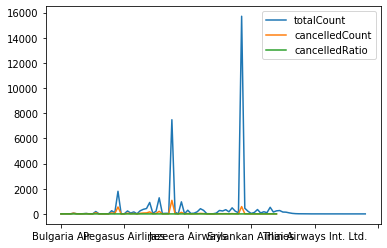

<matplotlib.axes._subplots.AxesSubplot at 0x7fef5d58ded0>

In [0]:
#We can very simply plot the above data using the .plot() function

df_airline_counts.plot()

Out[170]:

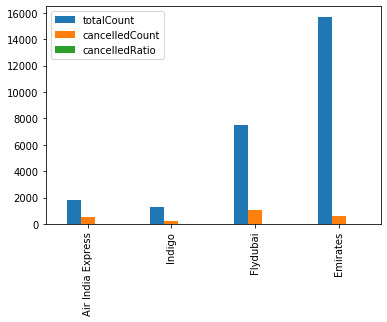

<matplotlib.axes._subplots.AxesSubplot at 0x7fef5cf2abd0>

In [0]:
#Hmmm let's try a different way to plot it

df_airline_counts.loc[df_airline_counts['totalCount'] > 1000].plot(kind='bar')

Out[171]:

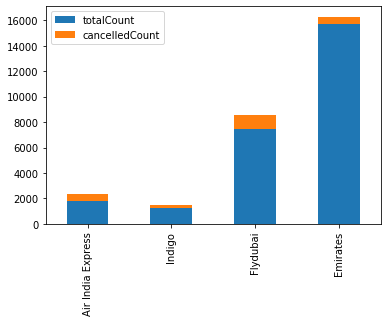

<matplotlib.axes._subplots.AxesSubplot at 0x7fef5d1339d0>

In [0]:
df_airline_counts[['totalCount', 'cancelledCount']].loc[df_airline_counts['totalCount'] > 1000].plot.bar(stacked=True)

## More Complex Filters

In [0]:
#How about we filter to all airlines in terminal 1

df.loc[df['aircraftTerminal'] == 1] 

Out[27]:

,aodbUniqueField,flightStatus,tenMileOut,flightNumber,trafficTypeCode,arrivalOrDeparture,lastChanged,airlineCode_iata,airlineCode_icao,jointFlightNumber,origin_iata,origin_icao,via_iata,via_icao,destination_iata,destination_icao,aircraft_iata,aircraft_icao,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal


That's weird? It doesn't return anything...

What seems to be wrong?

In [0]:
df.loc[df['aircraftTerminal'] == '1']['airlineName'].value_counts()

Out[31]: Indigo 128
Pakistan International Airlines 99
Spice Jet 32
Gulf Air 25
Oman Air 22
Saudi Arabian Airlines 22
Air India 20
Air Blue 16
FlyNas 13
Korean Airlines 11
Jazeera Airways 11
Ethiopian Airlines 7
Kuwait Airways 7
Norwegian Air Shuttle 6
Turkish Airlines 6
Middle East Airlines 6
British Airways 6
Kenya Airways 6
Aeroflot Russian Int.Airl. 6
Star Air Aviation 5
Royal Jordanian 5
Vistara 5
Biman Bangladesh Airlines 4
Philippine Airlines 3
Egypt Air 3
Swiss International Air Lines 3
KLM-Royal Dutch Airlines 3
Cathay Pacific Airways Ltd. 3
Thai Airways Int. Ltd. 3
Air France 3
Srilankan Airlines 3
Lufthansa 3
Finn Air 2
GoAir 2
Syrian Arab Airlines 2
Azerbaijan Airlines 2
Air Astana 2
Royal Brunei Airlines 2
Siberia Airlines 1
China Southern Airlines 1
Air Algerie 1
Air China 1
Air Canada 1
Uzbekistan Airways 1
Ukraine International Airlines 1
Iran Air 1
Singapore Airlines 1
Name: airlineName, dtype: int64

In [0]:
#How about we look at the count of flights for each airline for each terminal?

df_airline_counts_perterminal = pd.DataFrame()

for terminal in df['aircraftTerminal'].unique():
  df_airline_counts_perterminal['terminal_' +terminal+ '_count'] = df.loc[df['aircraftTerminal'] == terminal]['airlineName'].value_counts()
  
df_airline_counts_perterminal.head()  

Out[192]:

,terminal_2_count,terminal_3_count,terminal_1_count,terminal_PT_count
Flydubai,6160,1323.0,NaN,NaN
Air India Express,1798,NaN,NaN,NaN
Indigo,1152,NaN,128.0,NaN
Spice Jet,928,NaN,32.0,NaN
Air India,316,NaN,20.0,NaN


In [0]:
# We have a lot of nulls above, but in our case null means 0 (No flights in that terminal)

df_airline_counts_perterminal = df_airline_counts_perterminal.fillna(value=0)

df_airline_counts_perterminal.head()

Out[193]:

,terminal_2_count,terminal_3_count,terminal_1_count,terminal_PT_count
Flydubai,6160,1323.0,0.0,0.0
Air India Express,1798,0.0,0.0,0.0
Indigo,1152,0.0,128.0,0.0
Spice Jet,928,0.0,32.0,0.0
Air India,316,0.0,20.0,0.0


In [0]:
#Let's also reset the index and make into a column
df_airline_counts_perterminal = df_airline_counts_perterminal.reset_index()

df_airline_counts_perterminal.head()

Out[194]:

,index,terminal_2_count,terminal_3_count,terminal_1_count,terminal_PT_count
0,Flydubai,6160,1323.0,0.0,0.0
1,Air India Express,1798,0.0,0.0,0.0
2,Indigo,1152,0.0,128.0,0.0
3,Spice Jet,928,0.0,32.0,0.0
4,Air India,316,0.0,20.0,0.0


In [0]:
#Let's give the index column a name

df_airline_counts_perterminal = df_airline_counts_perterminal.rename(
  columns = {'index': 'airline'}
)
df_airline_counts_perterminal.head()

Out[201]:

,airline,terminal_2_count,terminal_3_count,terminal_1_count,terminal_PT_count
0,Flydubai,6160,1323.0,0.0,0.0
1,Air India Express,1798,0.0,0.0,0.0
2,Indigo,1152,0.0,128.0,0.0
3,Spice Jet,928,0.0,32.0,0.0
4,Air India,316,0.0,20.0,0.0


In [0]:
#Now let's look at Emirates Airlines counts per terminal
pd.DataFrame(df_airline_counts_perterminal.loc['Emirates']).fillna(value=0) #Because the airline name is now the index, you don't have to specify the column name

Out[46]:

,Emirates
terminal_2_count,1.0
terminal_3_count,15703.0
terminal_1_count,0.0
terminal_PT_count,0.0


Out[208]:

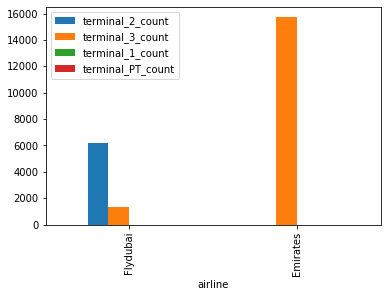

<matplotlib.axes._subplots.AxesSubplot at 0x7fef3d7c9610>

In [0]:
airlines = ['Emirates', 'Flydubai']

df_airline_counts_perterminal.loc[df_airline_counts_perterminal['airline'].isin(airlines)].plot.bar(x='airline')

In [0]:
df['flightStatus'].unique()

Out[66]: array([None, 'Estimated', 'Cancelled', 'Delayed', 'Arrived', 'Diverted',
 'Landed', 'Expected'], dtype=object)

In [0]:
#How about we look at the count of calncelled flights for each airline for each terminal?

df_airline_counts_perterminal_cancelled = pd.DataFrame()

for terminal in df['aircraftTerminal'].unique():
  df_airline_counts_perterminal_cancelled['terminal_' +terminal+ '_count'] = df.loc[
    
    (df['aircraftTerminal'] == terminal) & (df['flightStatus'] == 'Cancelled')
    
  ]['airlineName'].value_counts()
  
df_airline_counts_perterminal_cancelled = df_airline_counts_perterminal_cancelled.fillna(0)
  
df_airline_counts_perterminal_cancelled.head()

Out[64]:

,terminal_2_count,terminal_3_count,terminal_1_count,terminal_PT_count
Flydubai,945,133.0,NaN,NaN
Air India Express,550,NaN,NaN,NaN
Spice Jet,117,NaN,9.0,NaN
Indigo,107,NaN,100.0,NaN
Salam Air,87,NaN,NaN,NaN


In [0]:
#How about we look at all the arrived as well as the landed flights per terminal?

df_airline_counts_perterminal_cancelled_or_delayed = pd.DataFrame()

for terminal in df['aircraftTerminal'].unique():
  df_airline_counts_perterminal_cancelled_or_delayed['terminal_' +terminal+ '_count'] = df.loc[
    
    (df['aircraftTerminal'] == terminal) & 
    ((df['flightStatus'] == 'Cancelled') | (df['flightStatus'] == 'Delayed'))
    
  ]['airlineName'].value_counts()
  
df_airline_counts_perterminal_cancelled_or_delayed = df_airline_counts_perterminal_cancelled_or_delayed.fillna(0)
  
df_airline_counts_perterminal_cancelled_or_delayed.head()

Out[70]:

,terminal_2_count,terminal_3_count,terminal_1_count,terminal_PT_count
Flydubai,1007,142.0,0.0,0.0
Air India Express,561,0.0,0.0,0.0
Spice Jet,133,0.0,9.0,0.0
Indigo,108,0.0,100.0,0.0
Salam Air,89,0.0,0.0,0.0


In [0]:
#Finally how about all the flights that were not cancelled

df_airline_counts_perterminal_not_cancelled = pd.DataFrame()

for terminal in df['aircraftTerminal'].unique():
  df_airline_counts_perterminal_not_cancelled['terminal_' +terminal+ '_count'] = df.loc[
    
    (df['aircraftTerminal'] == terminal) & 
    (df['flightStatus'] != 'Cancelled')
    
  ]['airlineName'].value_counts()
  
df_airline_counts_perterminal_not_cancelled = df_airline_counts_perterminal_not_cancelled.fillna(0)
  
df_airline_counts_perterminal_not_cancelled.head()

Out[72]:

,terminal_2_count,terminal_3_count,terminal_1_count,terminal_PT_count
Flydubai,5215,1190.0,0.0,0.0
Air India Express,1248,0.0,0.0,0.0
Indigo,1045,0.0,28.0,0.0
Spice Jet,811,0.0,23.0,0.0
Air India,303,0.0,13.0,0.0


Let's do something different here and look at the flights from Tokyo

In [0]:
#First let's find all the flights from Tokyo.
df.loc[df['originName'].str.contains("Tokyo")].head()

Out[82]:

,flightStatus,aircraftRegistration,tenMileOut,flightNumber,arrivalOrDeparture,lastChanged,airlineCode_icao,jointFlightNumber,origin_icao,via_icao,destination_icao,aircraft_icao,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,estimatedInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
105,Arrived,A6EQK,2021-01-20 04:53:00,EK 319,A,2021-01-20 05:29:22,UAE,JL 5095,RJAA,None,OMDB,B77W,ARR,2021-01-20 05:30:00,2021-01-20 05:30:00,None,2021-01-20 04:58:39,2021-01-20 05:04:49,B18L,314.0,Emirates,Narita/Tokyo,None,Passenger Scheduled,3
753,Arrived,A6EQI,2021-01-17 05:30:00,EK 319,A,2021-01-17 06:06:47,UAE,JL 5095,RJAA,None,OMDB,B77W,ARR,2021-01-17 05:30:00,2021-01-17 05:30:00,None,2021-01-17 05:35:23,2021-01-17 05:44:00,B03,309.0,Emirates,Narita/Tokyo,None,Passenger Scheduled,3
1000,Arrived,A6EQK,2021-01-16 05:05:00,EK 319,A,2021-01-16 10:14:39,UAE,JL 5095,RJAA,None,OMDB,B77W,ARR,2021-01-16 05:30:00,2021-01-16 05:30:00,None,2021-01-16 05:08:19,2021-01-16 05:13:40,G05,303.0,Emirates,Narita/Tokyo,None,Passenger Scheduled,3
1244,Arrived,A6EQN,2021-01-15 05:10:00,EK 319,A,2021-01-15 05:50:44,UAE,JL 5095,RJAA,None,OMDB,B77W,ARR,2021-01-15 05:30:00,2021-01-15 05:30:00,None,2021-01-15 05:15:12,2021-01-15 05:24:31,B06,301.0,Emirates,Narita/Tokyo,None,Passenger Scheduled,3
1484,Arrived,A6EQI,2021-01-14 05:10:00,EK 319,A,2021-01-14 07:47:56,UAE,JL 5095,RJAA,None,OMDB,B77W,ARR,2021-01-14 05:30:00,2021-01-14 05:30:00,None,2021-01-14 05:16:01,2021-01-14 05:19:56,B27,309.0,Emirates,Narita/Tokyo,None,Passenger Scheduled,3


In [0]:
df.loc[df['originName'].str.contains("Tokyo")]['originName'].unique()

Out[83]: array(['Narita/Tokyo'], dtype=object)

Tokyo has another airport called Haneda but it seems that the string 'Tokyo' isn't included in the originName column for it.

So let's search for all flights with Tokyo or Haneda in their originName

In [0]:
#We can use a regex expression
df.loc[
  df['originName'].str.contains("Tokyo|Haneda")
]['originName'].unique()

Out[89]: array(['Narita/Tokyo', 'Haneda Airport'], dtype=object)

In [0]:
#Or we can filter the dataframe using multiple conditions
tokyo_airports = df.loc[
  (df['originName'].str.contains("Tokyo") | df['originName'].str.contains("Haneda"))
]['originName'].unique()

tokyo_airports

Out[90]: array(['Narita/Tokyo', 'Haneda Airport'], dtype=object)

In [0]:
#Now let's look at the count of flights coming from Tokyo per airline per terminal

df_airline_counts_perterminal_tokyo = pd.DataFrame()

for terminal in df['aircraftTerminal'].unique():
  df_airline_counts_perterminal_tokyo['terminal_' +terminal+ '_count'] = df.loc[
    (df['aircraftTerminal'] == terminal) &
    (df['originName'].isin(tokyo_airports))
  ]['airlineName'].value_counts()

#Also let's try transposing the table
df_airline_counts_perterminal_tokyo = df_airline_counts_perterminal_tokyo.T 
  
df_airline_counts_perterminal_tokyo.head()  

Out[99]:

,Emirates
terminal_2_count,NaN
terminal_3_count,121.0
terminal_1_count,NaN
terminal_PT_count,NaN


In [0]:
# How about the count of flights coming from Tokyo per airline per terminal and airport?

df_airline_counts_perterminal_tokyo_perairport = pd.DataFrame()

for terminal in df['aircraftTerminal'].unique():
  for airport in tokyo_airports:
    df_airline_counts_perterminal_tokyo_perairport['terminal_' +terminal+ '_from' +airport+ '_count'] = df.loc[
      (df['aircraftTerminal'] == terminal) &
      (df['originName'] == airport)
    ]['airlineName'].value_counts()

df_airline_counts_perterminal_tokyo_perairport = df_airline_counts_perterminal_tokyo_perairport.T     
    
df_airline_counts_perterminal_tokyo_perairport.head()  

Out[100]:

,Emirates
terminal_2_fromNarita/Tokyo_count,NaN
terminal_2_fromHaneda Airport_count,NaN
terminal_3_fromNarita/Tokyo_count,120.0
terminal_3_fromHaneda Airport_count,1.0
terminal_1_fromNarita/Tokyo_count,NaN


In [0]:
#Since all flights or on Emirates airlines anyway, Why don't we have the columns as the terminal and the airport as the rows instead?

df_counts_perterminal_tokyo_perairport = pd.DataFrame()

for terminal in df['aircraftTerminal'].unique():
  df_counts_perterminal_tokyo_perairport['terminal_' +terminal+ '_count'] = df.loc[
    (df['aircraftTerminal'] == terminal) &
    (df['originName'].isin(tokyo_airports))
  ]['originName'].value_counts()
  
df_counts_perterminal_tokyo_perairport

Out[113]:

,terminal_2_count,terminal_3_count,terminal_1_count,terminal_PT_count
Narita/Tokyo,NaN,120,NaN,NaN
Haneda Airport,NaN,1,NaN,NaN


In [0]:
#It seems that all flights are arriving to terminal 3 so let's pick something else to show

df_flight_counts_tokyo_perairport = pd.DataFrame()

for flight in df['flightNumber'].unique():
  df_flight_counts_tokyo_perairport['flightNumber_' +str(flight)+ '_count'] = df.loc[
    (df['flightNumber'] == flight) &
    (df['originName'].isin(tokyo_airports))
  ]['originName'].value_counts()
  
df_flight_counts_tokyo_perairport

Out[140]:

,flightNumber_FZ 306_count,flightNumber_AI 951_count,flightNumber_EK 202_count,flightNumber_FZ 010_count,flightNumber_FZ 338_count,flightNumber_EK 724_count,flightNumber_EK 840_count,flightNumber_EK 008_count,flightNumber_WY 611_count,flightNumber_PR 658_count,flightNumber_EK 858_count,flightNumber_SV 550_count,flightNumber_SV 556_count,flightNumber_6E 8223_count,flightNumber_EK 238_count,flightNumber_FZ 344_count,flightNumber_FZ 4348_count,flightNumber_EK 641_count,flightNumber_FZ 340_count,flightNumber_SG 135_count,flightNumber_FZ 8780_count,flightNumber_QB 2204_count,flightNumber_GF 508_count,flightNumber_MS 905_count,flightNumber_KU 673_count,...,flightNumber_FZ 836_count,flightNumber_FZ 868_count,flightNumber_EK 413_count,flightNumber_ZF 7703_count,flightNumber_EK 814_count,flightNumber_EK 8619_count,flightNumber_F7 9165_count,flightNumber_EK 824_count,flightNumber_ZF 7801_count,flightNumber_AI 917_count,flightNumber_EK 066_count,flightNumber_EK 188_count,flightNumber_F7 9183_count,flightNumber_FZ 056_count,flightNumber_FZ 8364_count,flightNumber_AC 056_count,flightNumber_EK 313_count,flightNumber_EK 773_count,flightNumber_EK 822_count,flightNumber_EK 860_count,flightNumber_JU 4800_count,flightNumber_FZ 044_count,flightNumber_SV 594_count,flightNumber_SU 526_count,flightNumber_F7 9157_count
Narita/Tokyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# can see that most flights are null. What we can do is transpose then drop nulls to find all valid flights 

df_flight_counts_tokyo_perairport = df_flight_counts_tokyo_perairport.T.dropna()

df_flight_counts_tokyo_perairport

Out[141]:

,Narita/Tokyo
flightNumber_EK 319_count,119.0
flightNumber_EK 9441_count,1.0


In [0]:
#Hmmmm, most flights from Narita are EK319. but there's a single EK 9441 flight. Let's check it out!

df.loc[df['flightNumber'] == 'EK 9441']

Out[142]:

,flightStatus,aircraftRegistration,tenMileOut,flightNumber,arrivalOrDeparture,lastChanged,airlineCode_iata,jointFlightNumber,origin_icao,via_iata,destination_iata,aircraft_iata,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,estimatedInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
36142,Arrived,A6ECR,2020-05-16 22:59:00,EK 9441,A,2020-05-16 23:11:05,EK,None,RJAA,None,DXB,77W,ARR,2020-05-16 23:10:00,2020-05-16 23:10:00,None,2020-05-16 23:03:53,2020-05-16 23:09:29,B18L,314.0,Emirates,Narita/Tokyo,None,Passenger Scheduled,3


The flight was in May so probably an emergency flight related to Covid? Feel free to look into it more if you're curious!

In [0]:
df.head()

Out[152]:

,flightStatus,aircraftRegistration,tenMileOut,flightNumber,arrivalOrDeparture,lastChanged,airlineCode_iata,jointFlightNumber,origin_icao,via_iata,destination_iata,aircraft_iata,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,estimatedInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType,aircraftTerminal
0,None,A6FEU,NaT,FZ 306,A,2021-01-20 06:39:31,FZ,None,OAKB,None,DXB,7S8,None,2021-01-20 20:55:00,2021-01-20 20:55:00,None,NaT,NaT,E04,6.0,Flydubai,Kabul,None,Passenger Scheduled,2
1,None,None,NaT,AI 951,A,2021-01-20 07:40:19,AI,None,VOHS,None,DXB,32N,None,2021-01-20 20:30:00,2021-01-20 20:30:00,None,NaT,NaT,E10R,5.0,Air India,Hyderabad/Rajiv Gandhi Int'l,None,Passenger Charter,2
2,Estimated,A6EQO,NaT,EK 202,A,2021-01-20 08:31:09,EK,None,KJFK,None,DXB,77W,EST,2021-01-20 20:25:00,2021-01-20 20:25:00,None,NaT,NaT,B24,307.0,Emirates,New York JFK,None,Passenger Scheduled,3
3,Cancelled,None,NaT,FZ 010,A,2021-01-19 18:05:36,FZ,None,OKBK,None,DXB,73H,CXX,2021-01-20 20:25:00,2021-01-20 20:25:00,None,NaT,NaT,None,NaN,Flydubai,Kuwait,None,Passenger Scheduled,2
4,None,A6FEY,NaT,FZ 338,A,2021-01-20 07:48:19,FZ,None,OPST,None,DXB,7S8,None,2021-01-20 20:20:00,2021-01-20 20:20:00,None,NaT,NaT,E29,4.0,Flydubai,Sialkot International Airport,None,Passenger Scheduled,2


In [0]:
#Last one I promise. How about we combine all we learned for a really needlessly complicated query.

complex_df = pd.DataFrame()

for terminal in df['aircraftTerminal'].unique():
    for airport in tokyo_airports:
      complex_df['terminal_' +terminal+ '_from' +airport+ '_count'] = df.loc[

        (df['aircraftTerminal'] == terminal) &
        (df['originName'] == airport) &
        ((df['flightStatus'] == 'Arrived') | (df['flightStatus'] == 'Delayed'))

      ]['trafficType'].value_counts()
    
complex_df.T.head()

Out[210]:

,Passenger Scheduled
terminal_2_fromNarita/Tokyo_count,NaN
terminal_2_fromHaneda Airport_count,NaN
terminal_3_fromNarita/Tokyo_count,117.0
terminal_3_fromHaneda Airport_count,1.0
terminal_1_fromNarita/Tokyo_count,NaN


## Working with Numeric Columns

Here is where the real juicy parts come in. Usually we would be working with numeric data, and there are a variety of ways to analyse them.

In [0]:
df.dtypes

Out[211]: flightStatus object
aircraftRegistration object
tenMileOut datetime64[ns]
flightNumber object
arrivalOrDeparture object
lastChanged datetime64[ns]
airlineCode_iata object
jointFlightNumber object
origin_icao object
via_iata object
destination_iata object
aircraft_iata object
flightStatusCode object
publicScheduledDateTime datetime64[ns]
scheduledInblockTime datetime64[ns]
estimatedInblockTime object
actualLandingTime datetime64[ns]
actualInblockTime datetime64[ns]
aircraftParkingPosition object
baggageClaimUnit float64
airlineName object
originName object
viaName object
trafficType object
aircraftTerminal object
dtype: object

The only numeric column we have is `baggageClaimUnit`, so let's try playing with it.

For numeric data we can use the dataframe function `.groupby()` to aggregate our data. 
This works with 3 main components:
1. **The Group By column.** The categorical column or columns to separate our data. Each unique value in our data will be it's own row.
2. **The columns to group.** The numerical (or categorical) data to be aggregated. 
3. **The aggregation function.** The function to use on the data to be aggregated. It can be `.sum()`, `.mean()`, `.median()`, and many more.

Previously we worked on count of unique values for each column using `value_counts()`.  This is essentially using group by on the column with a `.count()` function. As it is only the count of each value, it will take the row count of each column.

In [0]:
#Let's see with terminals
pd.DataFrame(
  df['aircraftTerminal'].value_counts()
)

Out[220]:

,aircraftTerminal
3,24615
2,12131
1,516
PT,36


In [0]:
df.groupby('aircraftTerminal').count()

Out[224]:

,flightStatus,aircraftRegistration,tenMileOut,flightNumber,arrivalOrDeparture,lastChanged,airlineCode_iata,jointFlightNumber,origin_icao,via_iata,destination_iata,aircraft_iata,flightStatusCode,publicScheduledDateTime,scheduledInblockTime,estimatedInblockTime,actualLandingTime,actualInblockTime,aircraftParkingPosition,baggageClaimUnit,airlineName,originName,viaName,trafficType
aircraftTerminal,,,,,,,,,,,,,,,,,,,,,,,,
1,456,149,118,516,516,516,516,13,516,7,516,516,456,516,516,0,118,117,193,172,516,516,7,516
2,11590,10128,9231,12131,12131,12131,12131,1545,12131,166,12131,12131,11590,12131,12131,0,9225,9199,10238,10019,12131,12131,138,12131
3,24094,23236,21950,24615,24615,24615,24615,1077,24615,652,24615,24615,24094,24615,24615,0,21918,21853,23380,23312,24615,24615,652,24615
PT,30,35,27,36,36,36,36,0,36,0,36,36,30,36,36,0,29,29,33,33,36,36,0,36


As you can see above. It will return the value count of each column for each terminal. However, it will not include the null values into the count. Basically, the more null values a row has, the smaller the count will be.

In [0]:
#Now let's work with numeric data
df_perairline_sum = df.groupby('airlineName').sum()

df_perairline_sum = df_perairline_sum.sort_values(by='baggageClaimUnit', ascending=False)

df_perairline_sum.head()

Out[268]:

,baggageClaimUnit
airlineName,
Emirates,4636888.0
Flydubai,392029.0
Pakistan International Airlines,226834.0
Egypt Air,155444.0
Ethiopian Airlines,138156.0


Unlike the `.count()` function, the `.sum()` function will only group numeric columns. 

We can also try other functions like `.mean()`

We will also use `as_index=False`, so that the groupby column is not set as index which will make plotting easier

In [0]:
#Now let's work with numeric data
df_perairline_avg = df.groupby('airlineName', as_index=False).mean()

df_perairline_avg = df_perairline_avg.sort_values(by='baggageClaimUnit', ascending=False)

df_perairline_avg.head()

Out[269]:

,airlineName,baggageClaimUnit
39,Iran Air,313.538012
21,Cham Wings Airlines,313.250000
1,Air Algerie,310.125000
64,Royal Air Moroc,307.761905
27,Emirates,307.730820


In [0]:
#We can also reset the index of an existing dataframe
df_perairline_sum = df_perairline_sum.reset_index()

df_perairline_sum.head()

Out[270]:

,airlineName,baggageClaimUnit
0,Emirates,4636888.0
1,Flydubai,392029.0
2,Pakistan International Airlines,226834.0
3,Egypt Air,155444.0
4,Ethiopian Airlines,138156.0


In [0]:
#Let's find all the airlines with more baggage claims than the mean
airlines_morethan_mean = df_perairline_sum.loc[
  df_perairline_sum['baggageClaimUnit'] > df_perairline_sum['baggageClaimUnit'].mean()
]

airlines_morethanmean.tail()

Out[276]:

,airlineName,baggageClaimUnit
8,Vistara,102241.0
9,Gulf Air,89108.0
10,British Airways,80119.0
11,Jazeera Airways,79800.0
12,Kuwait Airways,77966.0


Out[277]:

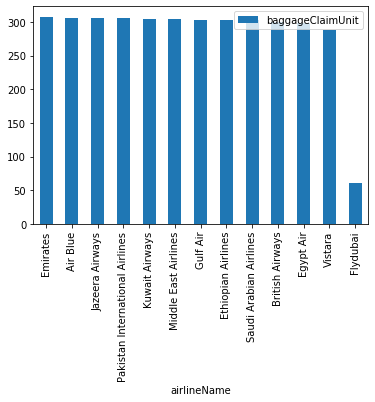

<matplotlib.axes._subplots.AxesSubplot at 0x7fef3d1c9f90>

In [0]:
#Let's try plotting

airlines = airlines_morethanmean['airlineName']

df_perairline.loc[df_perairline['airlineName'].isin(airlines)].plot.bar(x='airlineName')

But what if want to use multiple functions? Here we can use the `.agg()` function.

In [0]:
df_perairline = df.groupby('airlineName').agg(['sum', 'mean', 'median', 'max'])

df_perairline.head()

Out[256]:

baggageClaimUnit 
 
 
 
 sum 
 mean 
 median 
 max 
 
 
 airlineName 
 
 
 
 
 
 
 
 
 Aeroflot Russian Int.Airl. 
 30793.0 
 272.504425 
 307.0 
 314.0 
 
 
 Air Algerie 
 2481.0 
 310.125000 
 311.0 
 314.0 
 
 
 Air Astana 
 45345.0 
 304.328859 
 306.0 
 314.0 
 
 
 Air Blue 
 133183.0 
 306.167816 
 310.0 
 314.0 
 
 
 Air Canada 
 1.0 
 1.000000 
 1.0 
 1.0

In [0]:
# The above is using multiple column levels and is hard to work with. So let's do something else
df_perairline.columns = df_perairline.columns.to_flat_index()

df_perairline.head()

Out[257]:

,"(baggageClaimUnit, sum)","(baggageClaimUnit, mean)","(baggageClaimUnit, median)","(baggageClaimUnit, max)"
airlineName,,,,
Aeroflot Russian Int.Airl.,30793.0,272.504425,307.0,314.0
Air Algerie,2481.0,310.125000,311.0,314.0
Air Astana,45345.0,304.328859,306.0,314.0
Air Blue,133183.0,306.167816,310.0,314.0
Air Canada,1.0,1.000000,1.0,1.0


In [0]:
#as_index=False doesn't work here so let's reset the index manually

df_perairline = df_perairline.reset_index()

df_perairline.head()

Out[258]:

,airlineName,"(baggageClaimUnit, sum)","(baggageClaimUnit, mean)","(baggageClaimUnit, median)","(baggageClaimUnit, max)"
0,Aeroflot Russian Int.Airl.,30793.0,272.504425,307.0,314.0
1,Air Algerie,2481.0,310.125000,311.0,314.0
2,Air Astana,45345.0,304.328859,306.0,314.0
3,Air Blue,133183.0,306.167816,310.0,314.0
4,Air Canada,1.0,1.000000,1.0,1.0


In [0]:
df_perairport = df.groupby('originName').agg(['sum', 'mean', 'median', 'max'])

df_perairport.columns = df_perairport.columns.to_flat_index()
df_perairport = df_perairport.reset_index()

df_perairport.head()

Out[282]:

,originName,"(baggageClaimUnit, sum)","(baggageClaimUnit, mean)","(baggageClaimUnit, median)","(baggageClaimUnit, max)"
0,Abha,102.0,4.434783,5.0,6.0
1,Abidjan,16854.0,306.436364,306.0,314.0
2,Abuja,28757.0,305.925532,305.0,313.0
3,Accra,7692.0,307.680000,308.0,314.0
4,Addis Ababa,168073.0,263.850863,306.0,314.0


In [0]:
#We can also groupby multiple columns
df_perairport_perairline = df.groupby(['originName', 'airlineName']).sum()

df_perairport_perairline.head()

Out[284]:

baggageClaimUnit 
 
 
 originName 
 airlineName 
 
 
 
 
 
 Abha 
 Flydubai 
 102.0 
 
 
 Abidjan 
 Emirates 
 16854.0 
 
 
 Abuja 
 Emirates 
 28757.0 
 
 
 Ethiopian Airlines 
 0.0 
 
 
 Accra 
 Emirates 
 7692.0

In [0]:
#Pay attention to the order of the groupby columns
df_perairport_perairline = df.groupby(['airlineName', 'originName']).sum()

df_perairport_perairline.head()

Out[285]:

baggageClaimUnit 
 
 
 airlineName 
 originName 
 
 
 
 
 
 Aeroflot Russian Int.Airl. 
 Moskau-Sheremetyevo 
 30793.0 
 
 
 Air Algerie 
 Algier 
 2481.0 
 
 
 Air Astana 
 Almaty 
 40459.0 
 
 
 Nur-Sultan Nazarbayev Airport 
 4886.0 
 
 
 Air Blue 
 Islamabad 
 47402.0